# Introduction to complex networks theory
## Lesson 4: Types of links within networks

The goal of this notebook is to start geting familiar with the [networkx](https://networkx.org/) library, specially:
- network creation
- network import/export
- network drawing
- degree distribution of a network

In [1]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# !pip install networkx

### Directed networks

As in the last class, let's first create a simple directed graph and add a few links. In this case, we're not creating a graph object, but directed graph `DiGraph`:

In [4]:
# uncomment line below to read more about DiGraph
# ?nx.DiGraph

In [5]:
G = nx.DiGraph()

We can add a few directed edges to this graph and visualise it to investigate the differences:

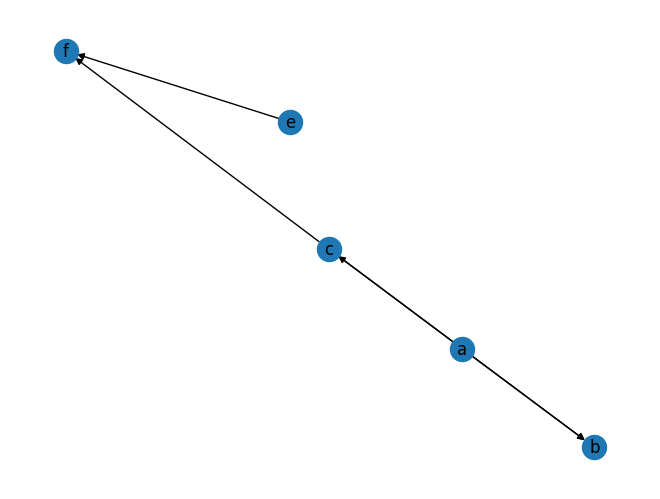

In [8]:
# G.add_edge('a','b')
G.add_edges_from([('a','b'),('a','c'),('e','f'),('c','f'),('c','b')])
nx.draw(G,with_labels=True)

As we might be drawing variants of these small graphs, we can fix a few nicer options in a function. More about python functions you can read [here](https://www.w3schools.com/python/python_functions.asp).

In [10]:
def pretty_plot(G):
    """A function that draws a graph G with predefined node sizes and colours."""
    nx.draw_circular(G,
            with_labels=True,
            node_color='darkcyan',
            node_size=1000,
            edge_color='lightgrey',
            width=4,
            font_color='white',
            font_size=16,
            )

Let's now call our function on the same graph to compare the results:

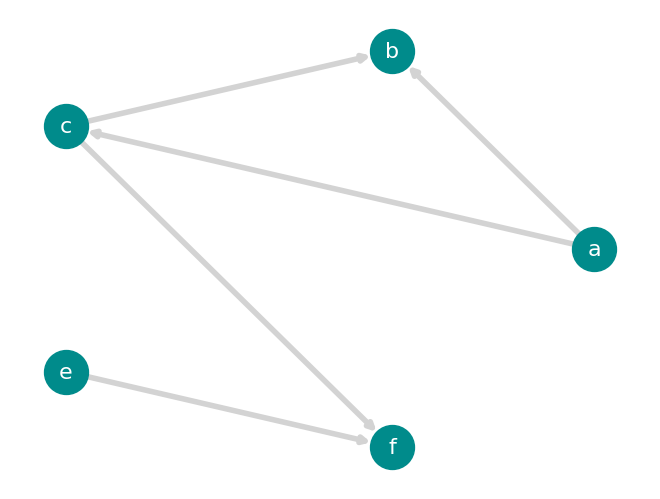

In [11]:
pretty_plot(G)

Now we can more clearly see all the links going in and out of node C.

As with undirected graph, we can see all the nodes or edges of the graph:

In [12]:
G.nodes

NodeView(('a', 'b', 'c', 'e', 'f'))

Compared to undirected graph, now the order of nodes in `has_edge` function is important:

In [13]:
G.has_edge('e','f')

True

In [14]:
G.has_edge('f','e')

False

As you can confirm in the figure, ther is link from e to f, but not the other way around.

How about the degrees?

In [15]:
G.degree()

DiDegreeView({'a': 2, 'b': 2, 'c': 3, 'e': 1, 'f': 2})

We see now that the node f has degree 2 the same as node a, while in one case that is indegree, and in another that is outdegree. In the case of directed network, `degree()` tells us about the total number of links given node is a part of, independent of their direction. If we want ot investigate in or out degree specifically, we have appropriate functions `in_degree` and `out_degree`:

In [16]:
G.in_degree('c'), G.out_degree('c'), G.degree('c')

(1, 2, 3)

We can also investigate inward edges of a given node, or out edges:

In [17]:
G.in_edges('b'), G.out_edges('b')

(InEdgeDataView([('a', 'b'), ('c', 'b')]), OutEdgeDataView([]))

In the undirected graphs, we looked for neighbors of a given node in this way:

In [19]:
list(G.neighbors('c'))

['f', 'b']

Instead of searching for "neighbors" of a node, for directed graphs, predecessors ("in-neighbors") and successors ("out-neighbors") make more sense:

In [20]:
list(G.predecessors('c'))

['a']

In [21]:
list(G.successors('c'))

['f', 'b']

Also, without plotting graph, you can quickly check if it is directed or not:

In [22]:
G.is_directed()

True

##### Real network example

As an example of directed graph, we will investigate a food web among the species found in [Little Rock Lake](https://networks.skewed.de/net/foodweb_little_rock). The nodes denote species, while links tell us about "who eats whom" connections, the direction of links represents nutrient transfer, so from food to the eater.
All the data is in the data folder `data/little_rock_foodweb`.

We'll import nodes and edges dataframes:

In [23]:
nodes = pd.read_csv('../data/little_rock_foodweb/nodes.csv')
nodes.head(2)

,# index,name,group,_pos
0,0,Fine organic matter,Fine organic matter,"array([ 9.84800554, 10.53079274])"
1,1,Tabellaria,Chrysophyceae,"array([10.24942227, 10.33781662])"


(small pandas use example)

We see that nodes have names associated with every specie, as well as their group. We can quickly check how many groups there are, and how many species per group

In [30]:
# to list all the columns of a dataframe:
nodes.columns

Index(['# index', 'name', 'group', '_pos'], dtype='object')

In [31]:
# as there are some spaces in the beggining of each column name, we can fix that in the following way:
nodes.columns = nodes.columns.str.strip()

To get the number of different (unique) elements in column 'group':

In [32]:
len(nodes['group'].unique())

37

While if we want to check the top 5 groups with the most species:

In [33]:
nodes.groupby('group').size().sort_values(ascending=False).head()

group
Diptera              31
Filamentous algea    25
Green algea          15
Pelagic rotifers     14
Bhentic cladocera    12
dtype: int64

Let's load also the information about the edges:

In [34]:
edges = pd.read_csv('../data/little_rock_foodweb/edges.csv')
edges.head(2)

,# source,target
0,0,1
1,0,2


To construct the network, we'll follow the same path as the last time, but pay attention to the new argument `create_using`. With it, we are stating that we are creating directed graph:

In [35]:
G_food_web = nx.from_pandas_edgelist(edges, 
                                     source = '# source', 
                                     target = ' target', 
                                     create_using =nx.DiGraph)

let's check that is the case:

In [36]:
G_food_web.is_directed()

True

let's investigate edges ending in 1 and edges starting in 1:

In [37]:
G_food_web.in_edges(1)

InEdgeDataView([(0, 1)])

In [38]:
G_food_web.out_edges(1)

OutEdgeDataView([(1, 65), (1, 67), (1, 68), (1, 69), (1, 76)])

just as a reminder, you can do that using the pandas dataframe (without constructing the network):

In [39]:
condition = (edges['# source']==1)|(edges[' target']==1)
#condition
edges[condition]

,# source,target
0,0,1
63,1,65
64,1,67
65,1,68
66,1,69
67,1,76


Also, any directed graph can be transformed to an undirected graph:

In [40]:
G_flat = G_food_web.to_undirected()

We can check if it is derected:

In [41]:
G_flat.is_directed()

False

We can see that predecessors and successors of any given node in the directed graph create neighbours of undirected graph:

In [42]:
list(G_food_web.predecessors(1)),list(G_food_web.successors(1))

([0], [65, 67, 68, 69, 76])

In [43]:
#G_flat.in_edges()
list(G_flat.neighbors(1))

[0, 65, 67, 68, 69, 76]

As last time we can also investigate adjecency matrix:

In [44]:
nx.adjacency_matrix(G_food_web).todense()

/var/folders/nx/gw8g05z555qgk82jcftv94z40000gn/T/ipykernel_44540/1141414601.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G_food_web).todense()


matrix([[0, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

We would like to investigate how degree distribution looks like for the food web network. For that, we'll start with creating dataframes with indegrees and outdegrees and then we will plot and compare them:

Let's create data frames with in_degree and out_degree of all nodes:

In [46]:
# remember this is how we get the list of in_degrees, but we'll put that into a dataframe
# G_food_web.in_degree()

In [47]:
indegrees = pd.DataFrame(G_food_web.in_degree(),
                         columns=['node','in_degree'])
indegrees.head(2)

,node,in_degree
0,0,0
1,1,1


In [48]:
outdegrees = pd.DataFrame(G_food_web.out_degree(),
                          columns=['node','out_degree'])
outdegrees.head(2)

,node,out_degree
0,0,63
1,1,5


These we can plot, first as a bar plot to compare in/out degree of every node individually:

In [49]:
#uncomment this to check, pay attention that here we used plot function from pandas not matplotlib library
#indegrees['in_degree'].plot()

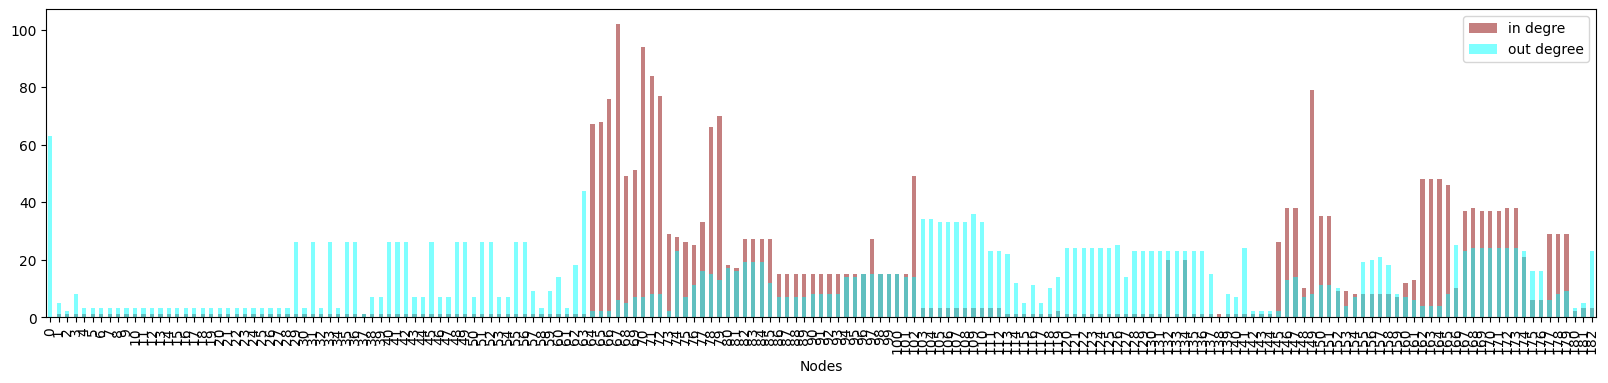

In [50]:
plt.figure(figsize=(20,4))
indegrees['in_degree'].plot(kind='bar',color='darkred',alpha=0.5,
                            label='in degre')
outdegrees['out_degree'].plot(kind='bar',alpha=0.5,
                              color='cyan',label='out degree')
plt.legend()
plt.xlabel('Nodes')
plt.show()

In [51]:
max(indegrees['in_degree']),max(outdegrees['out_degree'])

(102, 63)

##### Find the node that has the maximal in_degree/out_degree:

In [55]:
### one way
indegrees.sort_values(by='in_degree').tail(1)

,node,in_degree
67,69,102


In [54]:
### another way
condition = indegrees['in_degree'].max() == indegrees.in_degree
#condition
indegrees[condition]

,node,in_degree
67,69,102


We can also see if the in/out degree distribution differ:

In [56]:
# quick demo of np.linspace
# np.linspace(0,10,21)

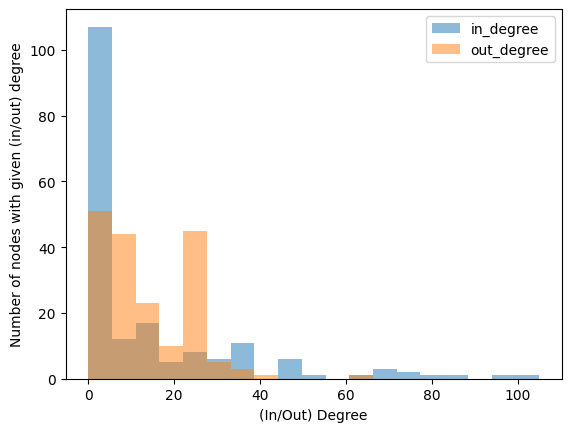

In [57]:
plt.hist(indegrees['in_degree'],bins=np.linspace(0,105,20),alpha=0.5,label='in_degree')
plt.hist(outdegrees['out_degree'],bins=np.linspace(0,105,20),alpha=0.5,label='out_degree')
#plt.yscale('log')
plt.legend()
plt.xlabel('(In/Out) Degree')
plt.ylabel('Number of nodes with given (in/out) degree')
plt.show()

We can compare means:

In [58]:
indegrees.in_degree.mean(),outdegrees.out_degree.mean()

(13.628415300546449, 13.628415300546449)

And althougth we see that the two distributions are quite different, means do not show that, let's see the medians:

In [59]:
indegrees.in_degree.median(),outdegrees.out_degree.median()

(1.0, 11.0)

Now the difference is more striking - this tells us that median indegree (number of distinct species eaten in this dataset) is 1, while median outdegree (number of distinct species that are eating the node in question) is 11. 

Finally, let's practice more table merges and join together in/out degree with the names of the species:

In [63]:
# we start by merging indegrees and outdegrees in one table using the node column:
joint_df = pd.merge(indegrees,outdegrees,on='node')
joint_df.head()

,node,in_degree,out_degree
0,0,0,63
1,1,1,5
2,2,1,2
3,3,1,8
4,4,1,3


To this table of in/out degrees we add only column name from nodes table, but we use column # index for merging:

In [64]:
joint_df = pd.merge(left = nodes[['# index','name']],
                    right = joint_df,
                    left_on='# index',
                    right_on='node')

Top 5 species by in_degree (these species eat the highest number of different species from the dataset)

In [65]:
joint_df.sort_values(by='in_degree',ascending=False).head(5)

,# index,name,node,in_degree,out_degree
69,69,Campeloma decisum,69,102,6
64,64,Amphipoda Crangonyx gracilis,64,94,7
73,73,Stenochironomus,73,84,8
75,75,Polypedilum,75,79,8
74,74,Pseudochironomus,74,77,8


If curious, you can read about the most diverse eater [here](https://en.wikipedia.org/wiki/Campeloma_decisum).

Top 5 species by out_degree (eaten by the most other species in the dataset):

In [66]:
joint_df.sort_values(by='out_degree',ascending=False).head(5)

,# index,name,node,in_degree,out_degree
0,0,Fine organic matter,0,0,63
63,63,Spongilla lacustris,63,1,44
136,136,Alonella excisa,136,3,36
108,108,Enallagma,108,3,34
131,131,Ophryoxus gracilis,131,3,34


You see in this dataset the most popular food is 'fine organic matter' that doesn't have in_degree as it can't eat :)

### Weighted networks

As an example of a weighted network, we'll use [Game of thrones network](https://networks.skewed.de/net/game_thrones), let's load first the edges:

In [67]:
# data = pd.read_csv('../data/london_transport/edges.csv') # this is also a weighted network, you can try it out
data = pd.read_csv('../data/game_thrones/edges.csv')

data.head()

,# source,target,weight
0,0,1,5
1,0,2,31
2,2,82,6
3,2,58,34
4,2,76,12


We see that already with every link the weight is associated in the column ' weight', let's sort the table based on that column to inspect min/max values:

In [68]:
data.sort_values(by=' weight')

,# source,target,weight
100,12,5,4
34,6,26,4
263,50,85,4
76,7,41,4
257,50,21,4
...,...,...,...
150,20,6,54
159,21,9,69
273,50,6,77
16,4,37,88


In [69]:
# we can also check summary statistics
data.describe()

,# source,target,weight
count,352.000000,352.000000,352.000000
mean,33.806818,42.738636,12.284091
std,26.010236,29.453810,12.688868
min,0.000000,0.000000,4.000000
25%,11.000000,18.000000,5.000000
50%,24.000000,39.500000,7.000000
75%,50.000000,62.000000,14.000000
max,106.000000,105.000000,96.000000


Creating a weighted network follows the same logic as with unweighted (either directed or undirected), the only difference is that we pass the colum with weight values through the `edge_attr` argument of the function:

In [70]:
G_gt = nx.from_pandas_edgelist(data, 
                               source = '# source', 
                               target = ' target', 
                               edge_attr=' weight')

If we just call the basic plotting function:

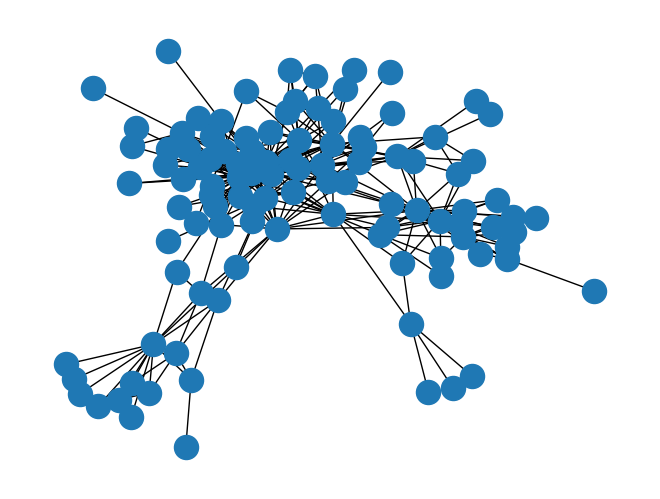

In [72]:
nx.draw_spring(G_gt)

We don't see the difference, e.g. weights are not plotted. That is why we invest a bit more time to plot this network and see the weights associated with each link:

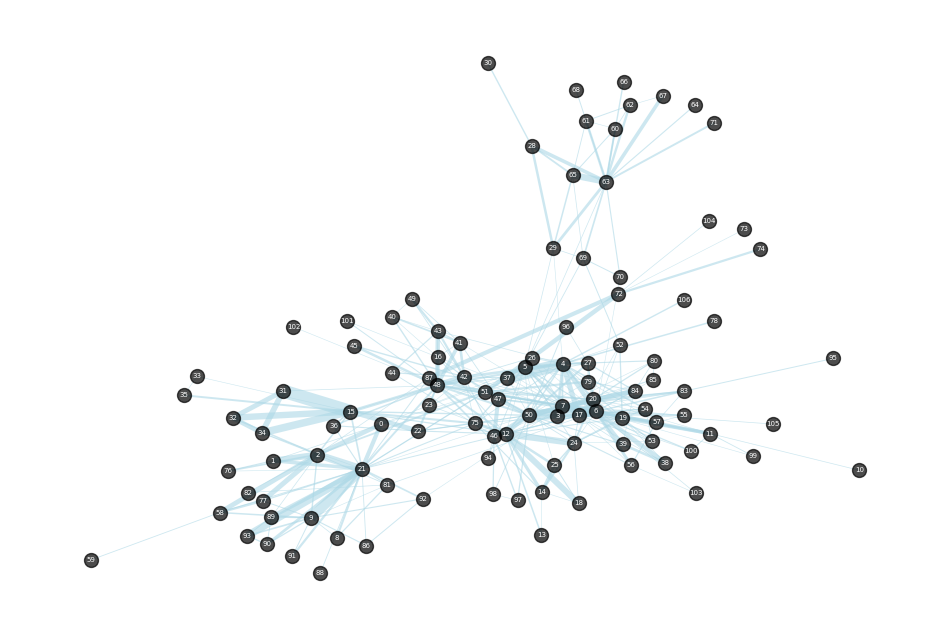

In [76]:
widths = nx.get_edge_attributes(G_gt, ' weight') # we extract attribute of each link into a separate dictionary
w_scaled = 0.1*np.array(list(widths.values())) # as some weights are high, we rescale widths with 0.1
nodelist = G_gt.nodes() # list of nodes (this can also be real names associated to each node)

plt.figure(figsize=(12,8)) # fig size

pos = nx.spring_layout(G_gt) # we define layout, try some others here

# draw nodes at this positions
nx.draw_networkx_nodes(G_gt,pos,
                       nodelist=nodelist,
                       node_size=100,
                       node_color='black',
                       alpha=0.7)
# draw edges
nx.draw_networkx_edges(G_gt,pos,
                       edgelist = widths.keys(),
                       width=w_scaled,#list(widths.values()),
                       edge_color='lightblue',
                       alpha=0.6)
# add node labels
nx.draw_networkx_labels(G_gt, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='white',font_size=5)
# remove plot axis box
plt.box(False)
plt.show()

#### How would you calculate node strength?

In [77]:
# space for your code here

In [79]:
# let's try with one node
node_i = 1

In [81]:
# this way we can find all links of that node
condition = (data['# source']==node_i)|(data[' target']==node_i)
data[condition]

,# source,target,weight
0,0,1,5
6,2,1,43
157,21,1,25
327,76,1,8


In [84]:
# and the strengths is sum of this table
data[condition][' weight'].sum()

81

In [87]:
# we can put this into a function
def strength(data, node_i):
    condition = (data['# source']==node_i)|(data[' target']==node_i)
    s = data[condition][' weight'].sum()
    return s

In [88]:
strength(data,4)

372

Alternative solution can be this one:

In [95]:
# we extract attribute of each link into a separate dictionary
widths = nx.get_edge_attributes(G_gt, ' weight') 

In [102]:
strength_i = 0
for node_j in G_gt.neighbors(node_i): # we loop over all nodes in the neighbourhood of i
    strength_i+=widths_d.get((node_i,node_j),0) # if there's a link from node_i to node_j, get its weight and sum to strength
    strength_i+=widths_d.get((node_j,node_i),0) # alternatively if theres node_j to node_i, get the strength
strength_i

81

You see we retrieved the same solution that also you can put into a function, but the pandas version we've created is faster than looping

### Bipartite networks

Let's try using some built in generators for these networks. One example could be to build a fully connected bipartite graph, we just need to decide the number of nodes in both partitions, here I use 2 nodes in first group and 3 in the second:

In [103]:
G = nx.complete_bipartite_graph(2, 3)

This function tells us about node groups in bipartite network

In [104]:
nx.bipartite.sets(G)

({0, 1}, {2, 3, 4})

It means node 'names' in first group are 0 and 1, and the second group it is 2,3,4, let's keep this information in two variables:

In [106]:
left, right = nx.bipartite.sets(G) #this way we get sets of nodes in both groups:

if we look at the edges, we can note that edges really exist only between groups as we expected:

In [109]:
list(G.edges)

[(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]

We can see how the bipartite network looks like

In [107]:
nx.bipartite.biadjacency_matrix(G,left).todense()

/var/folders/nx/gw8g05z555qgk82jcftv94z40000gn/T/ipykernel_44540/2073649391.py:1: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  nx.bipartite.biadjacency_matrix(G,left).todense()


matrix([[1, 1, 1],
        [1, 1, 1]])

But given that the network is fully connected the adjecency matrix is not particularly exciting (by the way, what would be different in an adjecency matrix of a fully connected monopartite graph?

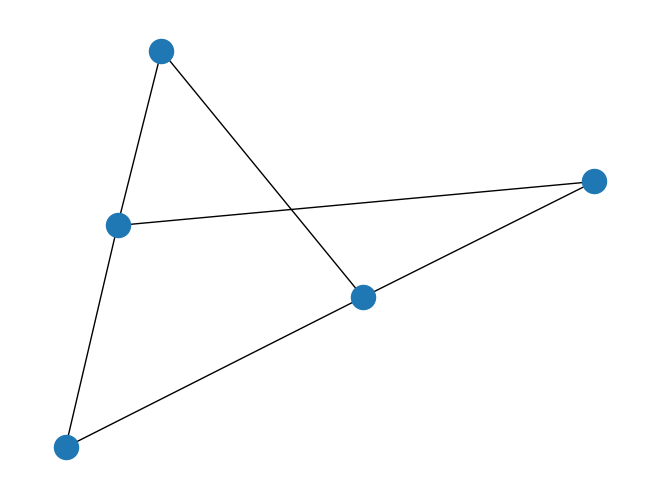

In [108]:
#let's see what we created
nx.draw(G)

This is not the optimal way to plot bipartite network, actually, we don't see that these nodes are not in the same group, let's make that better using two sets of nodes:

As before, we will plot network by first creating positions for network drawings, and then draw nodes and edges using those positions. Pay attention to the layout we've chosen now:

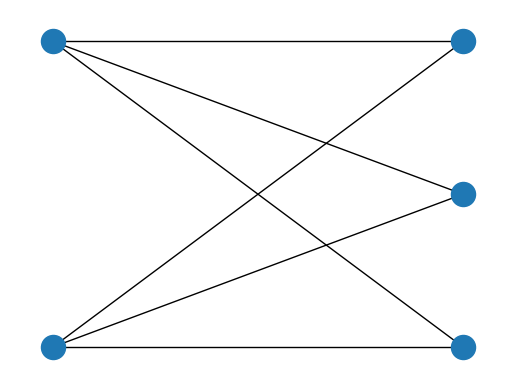

In [110]:
pos = nx.bipartite_layout(G, left)

nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
plt.axis('off')
plt.show()

Now the group separation is more clear, but as this network is fully connected it is not very interesting, let's try some other generated bipartite networks.

`gnmk_random_graph` function creates a bipartite network where links are randomly spread, you decide number of nodes in each group, and total number of links, and then the links are spread randomly:

In [111]:
G = nx.bipartite.gnmk_random_graph(3, 7, 10, seed=30)

With seed we control reproducibility of our random graph, so that I am sure you are getting the same group I got when you rerun the code. To make different variants, play around with seed

In [114]:
left, right = nx.bipartite.sets(G)

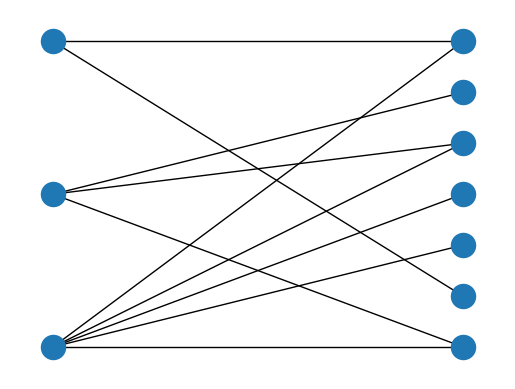

In [115]:
pos = nx.bipartite_layout(G, left)

nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
plt.axis('off')
plt.show()

We can easily make projection of this bipartite network to either group of nodes, those we called left or right set:

In [116]:
G_left = nx.projected_graph(G,left)
G_right = nx.projected_graph(G,right)

In [118]:
G_left.nodes

NodeView((0, 1, 2))

In [119]:
G_right.nodes

NodeView((3, 4, 5, 6, 7, 8, 9))

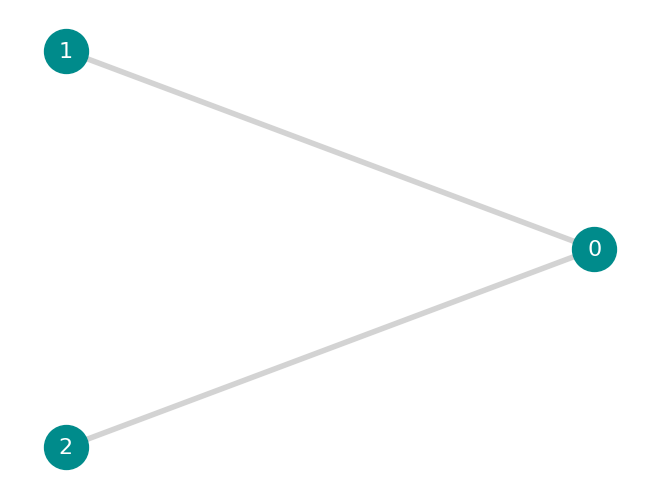

In [121]:
pretty_plot(G_left)

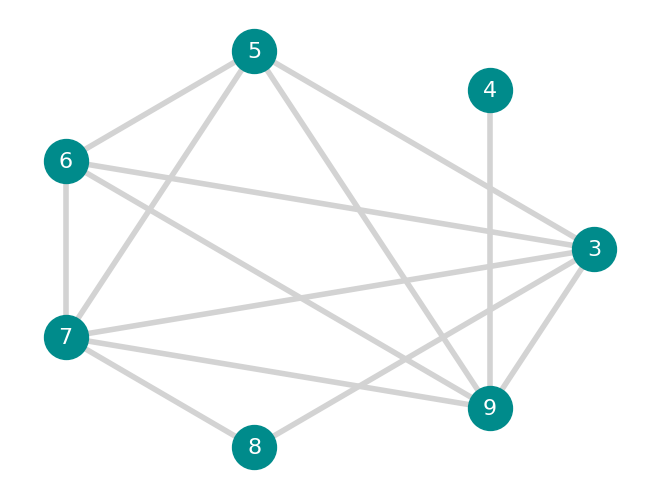

In [122]:
pretty_plot(G_right)

But these projections seem unweighted, let's check if we just didn't plot weights or the projections are unweighted:

In [123]:
nx.is_weighted(G_left),nx.is_weighted(G_right)

(False, False)

Both unweighted, however, we can make weighted projections using `weighted_projected_graph`:

In [124]:
G_left_w = nx.bipartite.weighted_projected_graph(G,left)

In [126]:
nx.is_weighted(G_left),nx.is_weighted(G_left_w)

(False, True)

In [133]:
nx.get_edge_attributes(G_left_w,'weight')

{(0, 1): 2, (0, 2): 1}

This way we see that nodes 0 and 1 connected to the two same nodes in the right group.

Make a weighted projection to the right group of nodes and see weights in that group, what's the maximal weight that can be observed in a projected graph?